<h1>Objective</h1>
<h4>Subscription prediction from the given dataset</h4>

##  Download and Prep the Data:

Import the modules needed

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline   

Download the dataset and read it into a dataframe

In [2]:
data=pd.read_csv('dvi-a2-ps2-data.csv')

First five items in the dataset.

In [3]:
data.head(5)
#Note:
#Top 5 records of the dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscription
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


Find out how many entries there are in the dataset.

In [4]:
data.shape

#Note:
#There area 41188 records in dataset and 21 features

(41188, 21)

Clean up data. <br>
Remove unnecessary columns. Mention the reasons.<br>
Show the data.

In [5]:
data.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscription
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [6]:
#Missing value checks
data = data.replace(to_replace="unknown",value=np.nan)
data = data.replace(to_replace=999,value=np.nan)
data.head(10)
data.isnull().sum()

#Note:
#Categorical features unknown is NULL/NA/Missing Value
#Numerical features 999 is NULL/NA/Missing Value
#We can see the sum of missing values in each features

age                   0
job                 330
marital              80
education          1731
default            8597
housing             990
loan                990
contact               0
month                 0
day_of_week           0
duration              2
campaign              0
pdays             39673
previous              0
poutcome              0
emp_var_rate          0
cons_price_idx        0
cons_conf_idx         0
euribor3m             0
nr_employed           0
subscription          0
dtype: int64

In [7]:
#Percentage of Missing values
data.isnull().mean()*100

#Note:
#Any feature which has more than 20% Missing values, Better to drop it rather than imputing NA, 
#which might wrongly represent the data
#Therefore we will be dropping pdays and default feature          

age                0.000000
job                0.801204
marital            0.194231
education          4.202680
default           20.872584
housing            2.403613
loan               2.403613
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.004856
campaign           0.000000
pdays             96.321744
previous           0.000000
poutcome           0.000000
emp_var_rate       0.000000
cons_price_idx     0.000000
cons_conf_idx      0.000000
euribor3m          0.000000
nr_employed        0.000000
subscription       0.000000
dtype: float64

In [8]:
data = data.drop(['pdays','default'], axis=1)
data.columns
#Note:
# pdays and default feature are dropped

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'previous', 'poutcome',
       'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m',
       'nr_employed', 'subscription'],
      dtype='object')

In [9]:
#Missing Values imputation
data['job'] = data['job'].fillna(data['job'].mode()[0])
data['marital'] = data['marital'].fillna(data['marital'].mode()[0])
data['education'] = data['education'].fillna(data['education'].mode()[0])
data['housing'] = data['housing'].fillna(data['housing'].mode()[0])
data['loan'] = data['loan'].fillna(data['loan'].mode()[0])
data['duration'] = data['duration'].fillna(data['duration'].median())
data.isnull().mean()*100
#Note:
#Imputation of NA/Missing values can be done by various methods depending on data types
#Like: Mode/KNN Imputation for categorical features and Mean/Median/KNN Imputation for Numerical features
#We will use Mode for categorical features Imputation
#We will use Median for Numerical feature Imputation

age               0.0
job               0.0
marital           0.0
education         0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
previous          0.0
poutcome          0.0
emp_var_rate      0.0
cons_price_idx    0.0
cons_conf_idx     0.0
euribor3m         0.0
nr_employed       0.0
subscription      0.0
dtype: float64

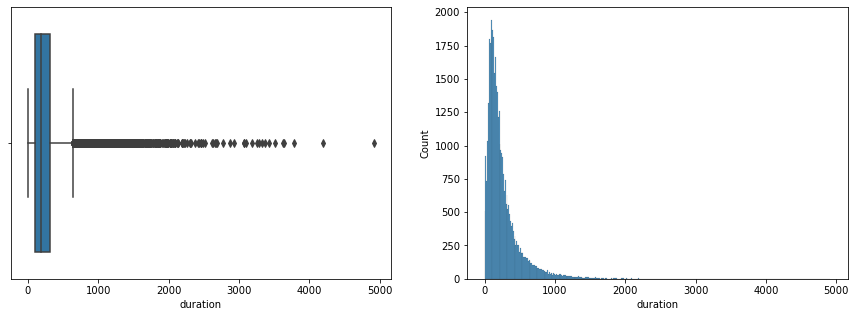

In [10]:
#Outliers
#duration  boxplot
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15,5))
sns.boxplot(data=data, x='duration', ax=ax[0])

#Note
#Upper tail outliers

#duration  histogram
sns.histplot(data=data, x='duration', ax=ax[1])
plt.show()
#Note
#Rightly skewed data

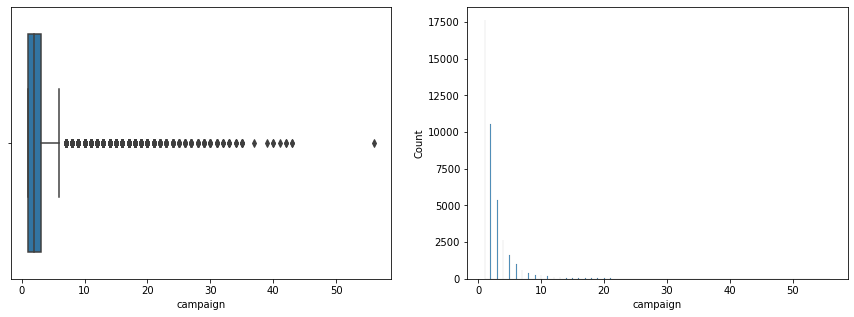

In [11]:
#campaign  boxplot
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15,5))
sns.boxplot(data=data, x='campaign', ax=ax[0])

#Note
#Upper tail outliers

#campaign  histogram
sns.histplot(data=data, x='campaign', ax=ax[1])
plt.show()
#Note
#Rightly skewed data

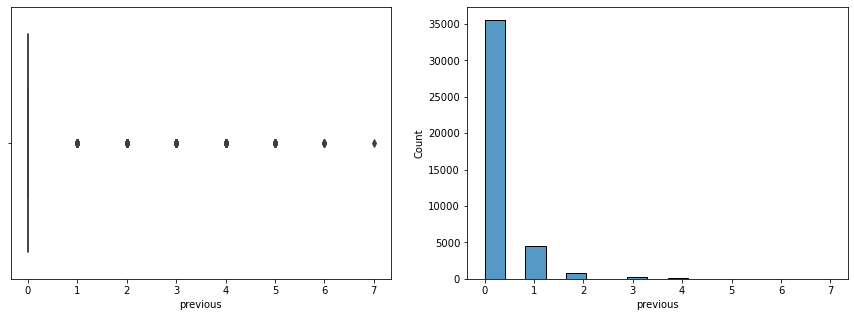

In [12]:
#previous  boxplot
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15,5))
sns.boxplot(data=data, x='previous', ax=ax[0])

#Note
#Upper tail outliers

#previous  histogram
sns.histplot(data=data, x='previous', ax=ax[1])
plt.show()
#Note
#Rightly skewed data

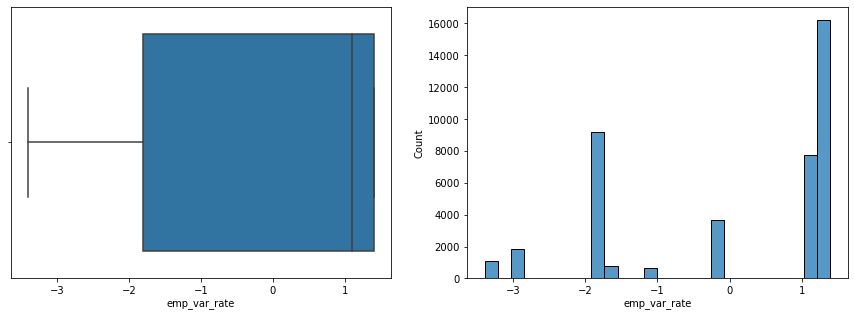

In [13]:
#emp_var_rate  boxplot
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15,5))
sns.boxplot(data=data, x='emp_var_rate', ax=ax[0])

#Note
#No Outliers

#emp_var_rate  histogram
sns.histplot(data=data, x='emp_var_rate', ax=ax[1])
plt.show()
#Note
#Slightly normal distribution

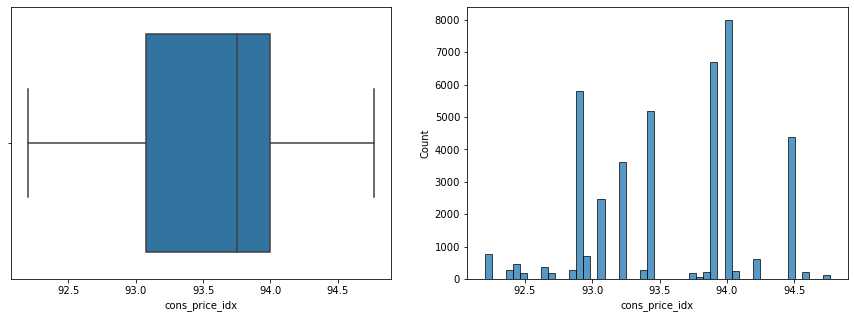

In [14]:
#cons_price_idx  boxplot
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15,5))
sns.boxplot(data=data, x='cons_price_idx', ax=ax[0])

#Note
#No Outliers

#cons_price_idx  histogram
sns.histplot(data=data, x='cons_price_idx', ax=ax[1])
plt.show()
#Note
#Slightly normal distribution

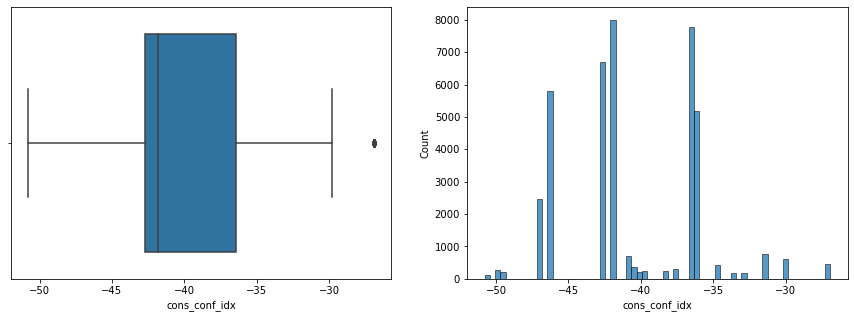

In [15]:
#cons_conf_idx  boxplot
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15,5))
sns.boxplot(data=data, x='cons_conf_idx', ax=ax[0])

#Note
#No Outliers

#cons_conf_idx  histogram
sns.histplot(data=data, x='cons_conf_idx', ax=ax[1])
plt.show()
#Note
#Slightly normal distribution

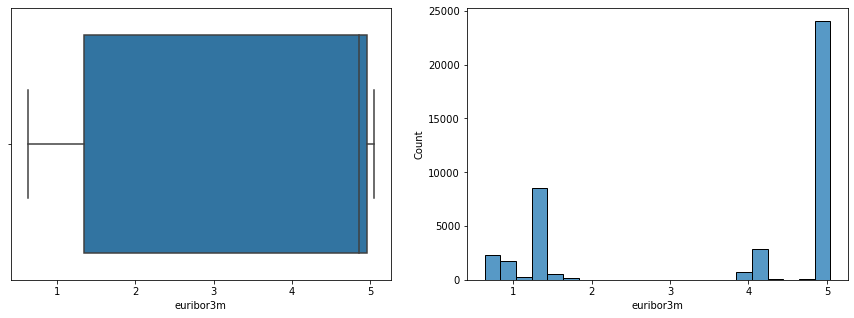

In [16]:
#euribor3m  boxplot
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15,5))
sns.boxplot(data=data, x='euribor3m', ax=ax[0])

#Note
#No Outliers

#euribor3m  histogram
sns.histplot(data=data, x='euribor3m', ax=ax[1])
plt.show()
#Note
#Slightly normal distribution

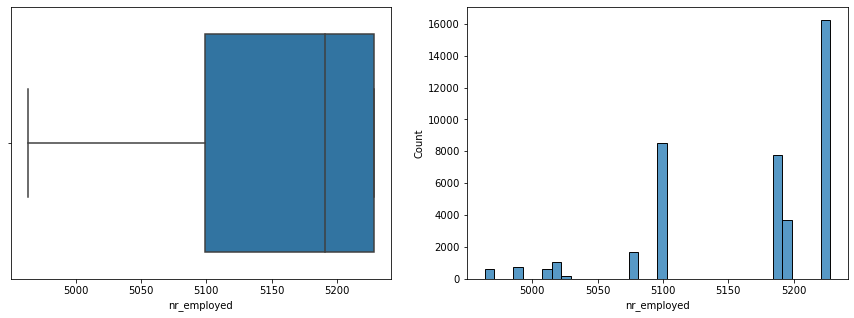

In [17]:
#nr_employed  boxplot
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15,5))
sns.boxplot(data=data, x='nr_employed', ax=ax[0])

#Note
#No Outliers

#nr_employed  histogram
sns.histplot(data=data, x='nr_employed', ax=ax[1])
plt.show()
#Note
#Slightly normal distribution

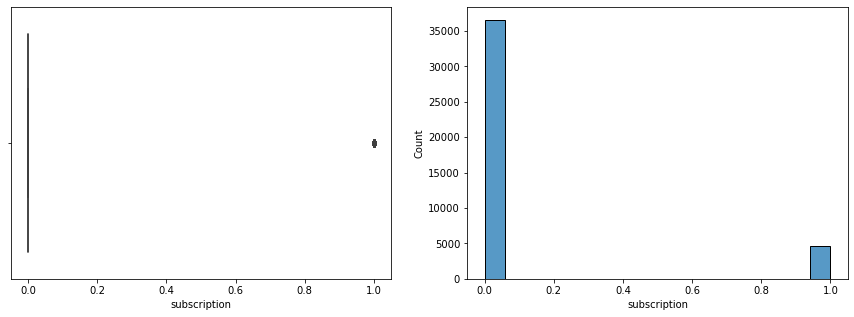

In [18]:
#subscription  boxplot
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15,5))
sns.boxplot(data=data, x='subscription', ax=ax[0])

#Note
#No Outliers

#subscription  histogram
sns.histplot(data=data, x='subscription', ax=ax[1])
plt.show()
#Note
#Slightly normal distribution

In [19]:
#Treatment for outliers values: duration
Q1=data['duration'].quantile(0.25)
Q3=data['duration'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR

data['duration'] = np.where((data['duration']>Upper_Whisker),data['duration'].quantile(0.90),
                             np.where((data['duration']<Lower_Whisker),data['duration'].quantile(0.10),data['duration']
                             ))

#Note
#Replacing outliers values with 90% quantile values for upper tail and 10% quantile values for lower tail outliers

In [20]:
#Treatment for outliers values: campaign
Q1=data['campaign'].quantile(0.25)
Q3=data['campaign'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR

data['campaign'] = np.where((data['campaign']>Upper_Whisker),data['campaign'].quantile(0.90),
                             np.where((data['campaign']<Lower_Whisker),data['campaign'].quantile(0.10),data['campaign']
                             ))

#Note
#Replacing outliers values with 90% quantile values for upper tail and 10% quantile values for lower tail outliers

In [21]:
data.describe()

,age,duration,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscription
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,228.253059,2.216859,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,162.861794,1.422644,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,644.000000,6.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [22]:
data.head(5)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscription
0,44,blue-collar,married,basic.4y,yes,no,cellular,aug,thu,210.0,1.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,university.degree,no,no,cellular,nov,fri,138.0,1.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,yes,no,cellular,jun,thu,339.0,3.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,cellular,apr,fri,185.0,2.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,yes,no,cellular,aug,fri,137.0,1.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


# Visualisation 

### Question 1
<h4>Find the correlation and plot the correlation between features.<br><br>
    Write the python code in the below cell to create appropriate visual to perform the above task.
    <h4>Answer in markdown cells below the visual <br><br>
        1.Summarise your findings from the visual.<br>
            2.The reason for selecting the chart type you did. <br>
                3.Mention the pre-attentive attributes used.(atleast 2)<br>
                    4.Mention the gestalt principles used.(atleast 2)<br>
   

,age,duration,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscription
age,1.000000,0.004711,0.000609,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,0.004711,1.000000,-0.079733,0.041028,-0.049118,0.000238,-0.004713,-0.056758,-0.074270,0.384297
campaign,0.000609,-0.079733,1.000000,-0.081208,0.142665,0.109956,-0.020199,0.123518,0.136623,-0.066999
previous,0.024365,0.041028,-0.081208,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp_var_rate,-0.000371,-0.049118,0.142665,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons_price_idx,0.000857,0.000238,0.109956,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons_conf_idx,0.129372,-0.004713,-0.020199,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.056758,0.123518,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr_employed,-0.017725,-0.074270,0.136623,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678
subscription,0.030399,0.384297,-0.066999,0.230181,-0.298334,-0.136211,0.054878,-0.307771,-0.354678,1.000000


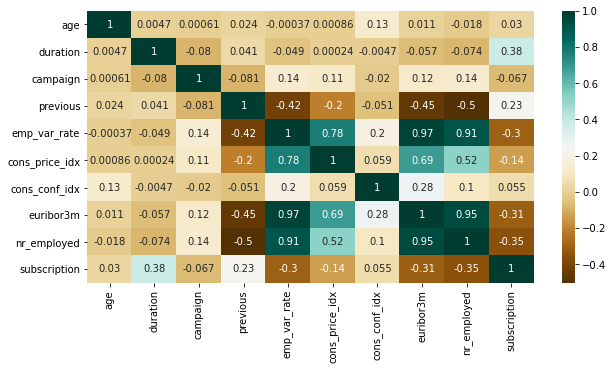

In [23]:
# Correlation between variables and dependent variable
plt.figure(figsize=(10,5))
c= data.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [24]:
data.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'previous', 'poutcome',
       'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m',
       'nr_employed', 'subscription'],
      dtype='object')

#1.) euribor3m is highly positively correlated with nr_employed and emp_var_rate AND previous is mildly negatively correlated with nr_employed, euribor3m and emp_var_rate  

#2.) The reason for selecting the heat map is heatmap provides realtime analytics to help campaigners and marketeers understand in seconds which are their best performing compaigns and lesser. 

#3.) The pre- attentitve attributes used are Color - The dark green color, which is  used to show a pattern which is highly correlated and dark brown is inversely related. The spatial position as you can see it represents best with heat map. 

#4.) The gestalt principles used -similarity and continuation

### Question 2
<h4>Find age distribution and Plot a graph for this. And check which age group is most likely to subscribe the bank.<br><br>
Write the python code in the below cell to create the appropriate visual to perform the above task .
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did. <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>  


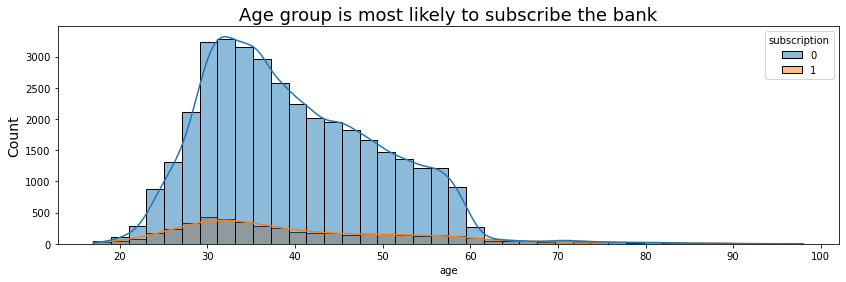

In [25]:
#age  displot
plt.figure(figsize=(14, 4))
sns.histplot(data=data, x='age', hue='subscription', bins=40, kde=True);
plt.title("Age group is most likely to subscribe the bank",fontsize=18)
plt.ylabel("Count",fontsize=14)
plt.show()

#1.) From above plot we can see that age group between 25 to 50 is most likely to subscribe

#2.)Plot univariate or bivariate histograms to show distributions of datasets. A histogram is a classic visualization tool that represents the distribution

#3.) The pre- attentitve attributes is the form of the graph which is equally spread that highlights the fact that the decision to subscribe is not based on age.  The size which shows that age group between 25 to 50 is most likely to subscribe.

#4.) The gestalt principles used -closure and proximity

### Question 3
<h4>Visualize number of contacts made in each month.<br><br>
Write the python code in the below cell to create the appropriate visual to perform the above task .
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did. <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>  


In [26]:
df = data.groupby(["month", "contact"]).size()
#graph_data = df.unstack(level=1)

#df.reset_index()
graph_data = df.reset_index()




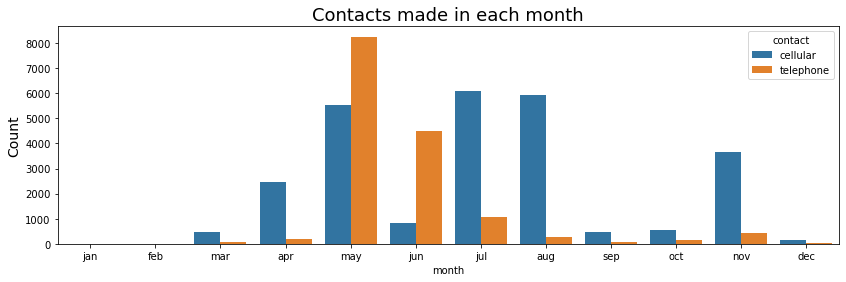

In [27]:
plt.figure(figsize=(14, 4))
sns.barplot(data=graph_data, x='month', y=0, hue = "contact", order = ["jan", "feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]);
#graph_data.plot(kind="bar")
plt.title("Contacts made in each month",fontsize=18)
plt.ylabel("Count",fontsize=14)
plt.show()

Answer

#1.) This visual shows how does capign contact were made across months. This graph shows that a telephone contact started on May at highest volume and it reduced in next three months, with little bit contact in Nov whereas the cellular contact gradually started in March stayed consistent till aug except the month of june and then again it was done in the month of Nov.

#2.) Bar Graph is used to show this value because the values are discrete here. This Bar graph is the pictorial representation of the contact data, where the length of bars are proportional to the number of conatacts made and their color represnts the type of contact. The picture here shows how customers are contacted , month over month using the conatact column.

#3.) The pre- attentitve attributes used are height and color of the graph as mentioned above.

#4.) The gestalt principles used -figure/ground, and symmetry

### Question 4
<h4>Categorize the data by grouping into education divisions and check which sector is more likely to subscribe.<br><br>
Write the python code in the below cell to create the appropriate visual to perform the above task .
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did. <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>  


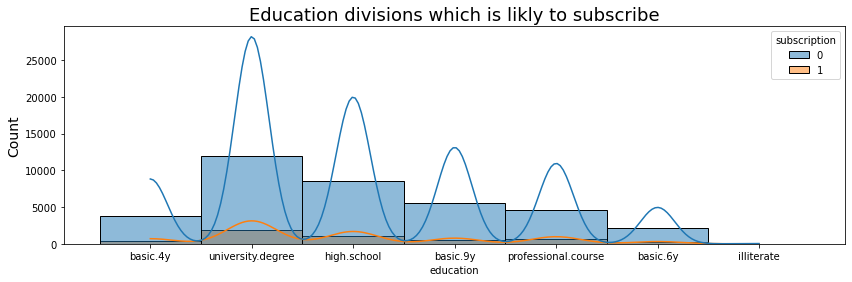

In [28]:
plt.figure(figsize=(14, 4))
sns.histplot(data=data, x='education', hue='subscription', bins=40, kde=True);
plt.title("Education divisions which is likly to subscribe",fontsize=18)
plt.ylabel("Count",fontsize=14)
plt.show()

#1.) University and high school has most subscription

#2.) Plot univariate or bivariate histograms to show distributions of datasets. A histogram is a classic visualization tool that represents the distribution

#3.) The pre- attentitve attributes used are Color - Blue, grey and orange makes beautiful visuals.

#4.) The gestalt principles used -figure/ground, and symmetry

### Question 5
<h4>Plot the chart to show the total number of clients subscribed to the deposit<br><br>
Write the python code in the below cell to create the appropriate visual to perform the above task .
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did. <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>  

C:\Users\dellpc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Total number of clients')

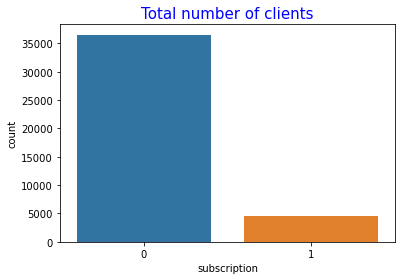

In [29]:
# Manner of death
sns.countplot(data.subscription)
#sns.countplot(kill.manner_of_death)
plt.title("Total number of clients",color = 'blue',fontsize=15)

#1.) It shows comparison

#2.) Plot univariate or bivariate histograms to show distributions of datasets. A histogram is a classic visualization tool that represents the distribution

#3.)The pre- attentitve attributes used are Color - Blue and orange makes beautiful visuals

#4.)The gestalt principles used - order


 
#### Frame 1 (more) question which will help in the EDA(Exploratory Data Analysis) of the given data set and answer the same using the best visual.
 
 1. Write the question in a markdown cell
 2. Below the question, in a coding cell, write the python code to create the visual to answer the question  

<h4> Answer in markdown cells below the visual <br><br>
   1.Summarise your findings from the visual.<br>
   2.The reason for selecting the chart type you did. <br>
   3.Mention the pre-attentive attributes used.(atleast 2)<br>
   4.Mention the gestalt principles used.(atleast 2)<br>
  

#Does campaign count impacts subscription?

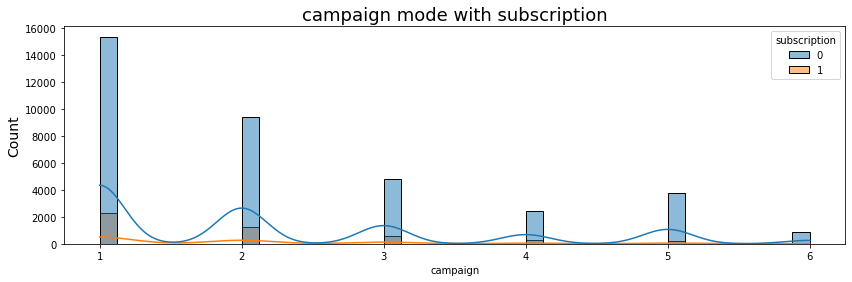

In [30]:
plt.figure(figsize=(14, 4))
sns.histplot(data=data, x='campaign', hue='subscription', bins=40, kde=True);
plt.title("campaign mode with subscription",fontsize=18)
plt.ylabel("Count",fontsize=14)
plt.show()

#1.) it shows comparison of histograms with different heights

#2.) Plot univariate or bivariate histograms to show distributions of datasets. A histogram is a classic visualization tool that represents the distribution

#3.) The pre- attentitve attributes used are Color - Blue and orange makes beautiful visuals

#4.)The gestalt principles used - similarity and continuation

<h1><center> ************ END ****************</center></h1>